# CAPSTONE PPROJECT

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Business Problem

In this project, We will be working on ways to optimise investing in the real estate sector in Nigeria (Lagos State), which has become increasingly popular over the last couple of years and has become a common investment thread.

The Real Estate sector is currently booming in Nigeria and people are making millions in it, irrespective of the economic downturn, it can be seen as a real money spinner.

We will be using the Power of Data Science to help the investor determine the areas where acquiring the properties will be beneficial or profitable while taking note of the kind of investment the investor requires, be it rentals, property development or land flipping.

Advantages of each area will then be clearly expressed so that best possible final location can be chosen by the investor

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## DATA

For this problem to be tackled and as every other problem is tackled in data science, we require data.
One of the challenges of this project is that the report is done on Nigeria. A country where there is very little housing data for the pre-existing areas, only for the new structures that have been created as a result of the resurgence of real estate in Nigeria.

Based on definition of our problem,

* Factors that will help in making a good decision are:

    * The location of the property( in our case the area )
    
        * How close Is it close to restaurants, schools, shops, public transportation, and other neighborhood amenities? 
        * Is it in a sought-after tourist destination? 
        * Is it close to the city center? The more popular and accessible an investment location is, the more valuable the property will be.
    * The push and pull of supply and demand on that area. If there is a high demand but fixed supply, the price of properties will rise as more people attempt to buy. 


* The following data sources will be needed to extract/generate the required information:

    * The Information concerning the housing data will be scraped from the websites **https://nigeriapropertycentre.com/market-trends**
    
        * this contains information about the prices and demand trends on each area in question.
            * There are four categories for the pricing
                * pricing for house sales
                * pricing for flat sales
                * pricing for house rentals
                * pricing for flat rentals
        * NOTE: Due to lack of data only a few areas in Lagos state was used for the project
        
    * The geographical data of the areas will be gotten by using googles map api.
        
    * The Number of restaurants, schools, shops, public transportation, and other neighborhood amenities and their types and location in every area will be obtained using **FOURSQUARE API**

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Getting the Housing Data for Lagos

#### PRICING DATA

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

Let's define a function that takes in the url and produces a dataframe containing the Pricing details for each category

In [3]:
 # due to limited data, I chose to pick from only areas that have only complete data
List_of_areas = ['Agege', 'Ajah','Alimosho', 'Amuwo Odofin', 'Apapa','Ayobo','Eko Atlantic City','Gbagada','Ibeju','Ibeju Lekki','Ifako-Ijaiye','Ijaiye','Ijede','Ikeja','Ikorodu','Ikotun','Ikoyi','Ilupeju','Ipaja','Isheri','Isheri North','Isolo','Ketu','Kosofe','Lagos Island','Lekki','Magodo', 'Maryland', 'Mushin','Ogudu','Ojo','Ojodu','Oshodi','Shomolu','Surulere','Victoria Island (VI)','Yaba']
areas = ['Agege', 'Aja','Alimosho', 'Amuwo Odofin Maternal & Childcare Service', 'Apapa Amusement Park','Ayobo','Eko Pearl Towers, Eko Atlantic','Gbagada','Ibeju','Ibeju Lekki','True Vine Estate, Ifako-Ijaiye','Agege Stadium Ijaiye','Ijede, Ikorodu','Oba Akran Avenue','Ikorodu Town Hall','Ikotun-Idimu Rd, Onilu','Ikoyi','Ilupeju','Ipaja','Adeyemo Akapo Street, Isheri','Isheri Olofin','Isolo','Ketu','Sobo Siffre Rd, Mende 100242','Lagos Island','Lekki', 'Magodo GRA 100248', 'Maryland Mall, Ikorodu Road', 'Ayangburen Rd, Ikorodu', 'Mushin','Ogudu GRA 100242','Ojo','Ojodu','Oshodi','Shomolu','Surulere','Karimu Kotun Street','Yaba']


def price_data_scraper(url):
    #scrape the data
    page = requests.get(url)
    sitedata = soup(page.content, 'html.parser')
    
    ## Extract data from the htmldoc that contains the data.
    table_data = sitedata.find_all('table')
    table_data = table_data[0]
    table_data = soup(str(table_data), 'html.parser')
    
    # Extract text from table rows
    tags = table_data('tr')
    lst = []
    count = 0
    for tag in tags:
        t = tag.get_text()
        lst.append(t)
    
    # Remove Headers
    lst.pop(0)    
    
    # To get position of the values in the rows because of possible whitespaces
    lists = lst[0].split('\n')
    pos =[]
    for n in range(len(lists)):
        if lists[n] != '':
            pos.append(n)
    
    # Creates a list of dictionaries with each dictionary containing the data for each row
    price_data = []
    for area in lst:
        
        file = area.split("\n")
        
        if file[pos[0]] not in List_of_areas:
            continue
            
        dets = {}
        
        r = file[pos[0]].strip()
        dets['Area'] = r
       
        r1 = file[pos[1]].strip()
        dets['Average Price'] = r1[1:]
        
        r2 = file[pos[2]].strip()
        dets['Max. Property Price'] = r2[1:]
        
        r3 = file[pos[3]].strip()
        dets['Min. Property Price'] = r3[1:]
        
        r4 = file[pos[4]].strip()
        dets['Total Property Count'] = r4
        
        price_data.append(dets)
        
    price_df = pd.DataFrame(price_data)

    
    return price_df


Now let's use the function to create the dataframes

In [4]:
house_price_url = 'https://nigeriapropertycentre.com/market-trends/average-prices/for-sale/houses/lagos'
flat_price_url = 'https://nigeriapropertycentre.com/market-trends/average-prices/for-sale/flats-apartments/lagos'
houses_rent_price_url = 'https://nigeriapropertycentre.com/market-trends/average-prices/for-rent/houses/lagos'
flats_rent_price_url = 'https://nigeriapropertycentre.com/market-trends/average-prices/for-rent/flats-apartments/lagos'

house_prices_df = price_data_scraper(house_price_url)
flats_prices_df = price_data_scraper(flat_price_url)
house_rent_prices_df = price_data_scraper(houses_rent_price_url)
flats_rent_prices_df = price_data_scraper(flats_rent_price_url)

Now lets join all the dataframes together according to the areas, and dropping the New Property Added column as it's relevance is negligible

In [5]:
full_pricing_data = house_prices_df.sort_values(by='Area').reset_index(drop=True)
full_pricing_data.rename(columns = {'Area':'Areas'}, inplace=True)

full_pricing_data = full_pricing_data.join(flats_prices_df.sort_values(by='Area').reset_index(drop=True), lsuffix = ' For Houses', rsuffix=' For Flats')
full_pricing_data.drop(columns=['Area'], inplace=True)

full_pricing_data = full_pricing_data.join(house_rent_prices_df.sort_values(by='Area').reset_index(drop=True))
full_pricing_data.drop(columns=['Area'], inplace=True)

full_pricing_data = full_pricing_data.join(flats_rent_prices_df.sort_values(by='Area').reset_index(drop=True), lsuffix=' For House Rentals', rsuffix = '  For Flat Rentals')
full_pricing_data.drop(columns=['Area'], inplace=True)
full_pricing_data.head()

,Areas,Average Price For Houses,Max. Property Price For Houses,Min. Property Price For Houses,Total Property Count For Houses,Average Price For Flats,Max. Property Price For Flats,Min. Property Price For Flats,Total Property Count For Flats,Average Price For House Rentals,Max. Property Price For House Rentals,Min. Property Price For House Rentals,Total Property Count For House Rentals,Average Price For Flat Rentals,Max. Property Price For Flat Rentals,Min. Property Price For Flat Rentals,Total Property Count For Flat Rentals
0,Agege,"37,660,000","150,000,000","500,000",343,"24,610,000","150,000,000","700,000",57,"800,000","3,000,000","250,000",50,"540,000","17,000,000","150,000",296
1,Ajah,"44,650,000","60,000,000,000","1,000,000","5,147","23,070,000","110,000,000,000","1,100,000",405,"1,720,000","1,500,000,000","100,000","1,408","800,000","120,000,000,000","55,000","5,995"
2,Alimosho,"26,260,000","120,000,000","5,000,000",283,"19,660,000","110,000,000","4,000,000",50,"730,000","2,000,000","300,000",44,"470,000","1,500,000","100,000",182
3,Amuwo Odofin,"53,120,000","280,000,000","16,000,000",77,"26,420,000","75,000,000","15,000,000",13,"1,370,000","3,500,000","700,000",25,"880,000","1,700,000","200,000",101
4,Apapa,"102,290,000","500,000,000","35,000,000",24,"158,750,000","500,000,000","35,000,000",4,"4,500,000","8,000,000","1,000,000",7,"1,740,000","4,000,000","400,000",14


In [6]:
full_pricing_data

,Areas,Average Price For Houses,Max. Property Price For Houses,Min. Property Price For Houses,Total Property Count For Houses,Average Price For Flats,Max. Property Price For Flats,Min. Property Price For Flats,Total Property Count For Flats,Average Price For House Rentals,Max. Property Price For House Rentals,Min. Property Price For House Rentals,Total Property Count For House Rentals,Average Price For Flat Rentals,Max. Property Price For Flat Rentals,Min. Property Price For Flat Rentals,Total Property Count For Flat Rentals
0,Agege,"37,660,000","150,000,000","500,000",343,"24,610,000","150,000,000","700,000",57,"800,000","3,000,000","250,000",50,"540,000","17,000,000","150,000",296
1,Ajah,"44,650,000","60,000,000,000","1,000,000","5,147","23,070,000","110,000,000,000","1,100,000",405,"1,720,000","1,500,000,000","100,000","1,408","800,000","120,000,000,000","55,000","5,995"
2,Alimosho,"26,260,000","120,000,000","5,000,000",283,"19,660,000","110,000,000","4,000,000",50,"730,000","2,000,000","300,000",44,"470,000","1,500,000","100,000",182
3,Amuwo Odofin,"53,120,000","280,000,000","16,000,000",77,"26,420,000","75,000,000","15,000,000",13,"1,370,000","3,500,000","700,000",25,"880,000","1,700,000","200,000",101
4,Apapa,"102,290,000","500,000,000","35,000,000",24,"158,750,000","500,000,000","35,000,000",4,"4,500,000","8,000,000","1,000,000",7,"1,740,000","4,000,000","400,000",14
5,Ayobo,"12,970,000","135,000,000","2,200,000",71,"14,100,000","45,000,000","3,000,000",10,"370,000","800,000","72,000",7,"290,000","800,000","90,000",132
6,Eko Atlantic City,"99,650,000","700,000,000","17,200,000",8,"281,110,000","900,000,000","8,700,000",9,"5,000,000","5,000,000","5,000,000",1,"29,430,000","40,000,000","10,000,000",7
7,Gbagada,"53,230,000","280,000,000","6,000,000",241,"37,890,000","250,000,000","15,500,000",56,"2,290,000","65,000,000","200,000",242,"1,150,000","1,300,000,000","180,000",788
8,Ibeju,"26,430,000","70,000,000","10,000,000",26,"10,280,000","15,000,000","2,000,000",5,"1,900,000","2,300,000","1,500,000",2,"430,000","800,000","200,000",12
9,Ibeju Lekki,"28,750,000","350,000,000","1,395,000",875,"14,770,000","65,000,000","3,500,000",131,"1,240,000","1,500,000,000","170,000",199,"490,000","350,000,000","80,000",969


Adding the (₦) sign to the columns that have the word price in them

In [7]:
for column in full_pricing_data.columns:
    if "Price" in column:
        new_column = '{} (₦)'.format(column)
        full_pricing_data.rename(columns={column:new_column}, inplace=True)

In [8]:
full_pricing_data.head()

,Areas,Average Price For Houses (₦),Max. Property Price For Houses (₦),Min. Property Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Max. Property Price For Flats (₦),Min. Property Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Max. Property Price For House Rentals (₦),Min. Property Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Max. Property Price For Flat Rentals (₦),Min. Property Price For Flat Rentals (₦),Total Property Count For Flat Rentals
0,Agege,"37,660,000","150,000,000","500,000",343,"24,610,000","150,000,000","700,000",57,"800,000","3,000,000","250,000",50,"540,000","17,000,000","150,000",296
1,Ajah,"44,650,000","60,000,000,000","1,000,000","5,147","23,070,000","110,000,000,000","1,100,000",405,"1,720,000","1,500,000,000","100,000","1,408","800,000","120,000,000,000","55,000","5,995"
2,Alimosho,"26,260,000","120,000,000","5,000,000",283,"19,660,000","110,000,000","4,000,000",50,"730,000","2,000,000","300,000",44,"470,000","1,500,000","100,000",182
3,Amuwo Odofin,"53,120,000","280,000,000","16,000,000",77,"26,420,000","75,000,000","15,000,000",13,"1,370,000","3,500,000","700,000",25,"880,000","1,700,000","200,000",101
4,Apapa,"102,290,000","500,000,000","35,000,000",24,"158,750,000","500,000,000","35,000,000",4,"4,500,000","8,000,000","1,000,000",7,"1,740,000","4,000,000","400,000",14


#### DEMAND TRENDS

For the demand trends, let's first scrape demand data using a new function to handle the data from the url and turn it directly into a datframe

In [9]:
def demand_data_scraper(url):
    #scrape the data
    page = requests.get(url)
    sitedata = soup(page.content, 'html.parser')
    
    ## Extract data from the htmldoc that contains the data.
    table_data = sitedata.find_all('table')
    table_data = table_data[0]
    table_data = soup(str(table_data), 'html.parser')
    
    # Extract text from table rows
    tags = table_data('tr')
    lst = []
    count = 0
    for tag in tags:
        t = tag.get_text()
        lst.append(t)
    
    # Remove Headers
    lst.pop(0)    
    
    # To get position of the values in the rows because of possible whitespaces in the list '\n'
    lists = lst[0].split('\n')
    pos =[]
    for n in range(len(lists)):
        if lists[n] != '':
            pos.append(n)
    
    # Creates a list of dictionaries with each dictionary containing the data for each row
    price_data = []
    for area in lst:
        file = area.split("\n")
        if file[pos[1]] not in List_of_areas:
            continue
        dets = {}
        dets['Locality'] = file[pos[1]]
        dets['Demand Percentage'] = file[pos[2]][:-1]
        price_data.append(dets)
        
    demand_df = pd.DataFrame(price_data)
    
    return demand_df

In [10]:
prop_demand_url = 'https://nigeriapropertycentre.com/market-trends/demand-trends/lagos'
rentals_demand_url = 'https://nigeriapropertycentre.com/market-trends/demand-trends/for-rent/lagos'
for_sale_demand_url = 'https://nigeriapropertycentre.com/market-trends/demand-trends/for-sale/lagos'
short_lets_demand_url ='https://nigeriapropertycentre.com/market-trends/demand-trends/for-rent/short-let/lagos'
joint_ventures_demand_url = 'https://nigeriapropertycentre.com/market-trends/demand-trends/joint-venture/lagos'


prop_demand_df = demand_data_scraper(prop_demand_url)
rentals_demand_df = demand_data_scraper(rentals_demand_url)
for_sale_demand_df = demand_data_scraper(for_sale_demand_url)
short_lets_demand_df = demand_data_scraper(short_lets_demand_url)
joint_ventures_demand_df = demand_data_scraper(joint_ventures_demand_url)

Let's continue by joining by each category together into one dataframe, by the areas

In [11]:
prop_demand_df.rename(columns = {'Demand Percentage':'Overall Demand Percentage (%)','Locality':'Areas'}, inplace=True)
prop_demand_df.sort_values(by='Areas', inplace=True)
prop_demand_df.reset_index(drop=True, inplace=True)

full_demand_df = prop_demand_df.join(rentals_demand_df.sort_values(by='Locality').reset_index(drop=True))
full_demand_df.drop(columns=['Locality'], inplace=True)


full_demand_df = full_demand_df.join(for_sale_demand_df.sort_values(by='Locality').reset_index(drop=True), lsuffix=' For Rentals (%)', rsuffix=' For Sales (%)')
full_demand_df.drop(columns=['Locality'], inplace=True)


full_demand_df = full_demand_df.join(short_lets_demand_df.sort_values(by='Locality').reset_index(drop=True))
full_demand_df.drop(columns=['Locality'], inplace=True)


full_demand_df = full_demand_df.join(joint_ventures_demand_df.sort_values(by='Locality').reset_index(drop=True), lsuffix=' For Short Lets (%)', rsuffix=' For Joint Ventures (%)')
full_demand_df.drop(columns=['Locality'], inplace=True)

def calc_percentage(df): 
    total = df.sum()
    df = np.round(((df/total)*100), 1)
    return df

column = full_demand_df.columns


for col in column[1:]:
    full_demand_df[col] = full_demand_df[col].astype(float)
    full_demand_df[col] = calc_percentage(full_demand_df[col])
    
    
full_demand_df.head()

,Areas,Overall Demand Percentage (%),Demand Percentage For Rentals (%),Demand Percentage For Sales (%),Demand Percentage For Short Lets (%),Demand Percentage For Joint Ventures (%)
0,Agege,1.3,1.3,1.3,0.3,0.3
1,Ajah,13.0,15.4,9.1,5.3,4.4
2,Alimosho,1.4,1.3,1.4,0.2,0.4
3,Amuwo Odofin,0.6,0.5,0.7,1.6,0.2
4,Apapa,0.3,0.3,0.4,0.1,0.2


Now let's join the full_pricing_data and full_demand_df together to fet the housing data

In [12]:
# Dropping Min and Maximum prices for each category
columns = []
for column in full_pricing_data.columns:
    if column.startswith('Min.'):
        continue
    elif column.startswith('Max.'):
        continue
    else:
        columns.append(column)

housing_data = full_pricing_data[columns].join(full_demand_df, rsuffix='2')
housing_data.drop(columns=['Areas2'], inplace=True)
housing_data

,Areas,Average Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Total Property Count For Flat Rentals,Overall Demand Percentage (%),Demand Percentage For Rentals (%),Demand Percentage For Sales (%),Demand Percentage For Short Lets (%),Demand Percentage For Joint Ventures (%)
0,Agege,"37,660,000",343,"24,610,000",57,"800,000",50,"540,000",296,1.3,1.3,1.3,0.3,0.3
1,Ajah,"44,650,000","5,147","23,070,000",405,"1,720,000","1,408","800,000","5,995",13.0,15.4,9.1,5.3,4.4
2,Alimosho,"26,260,000",283,"19,660,000",50,"730,000",44,"470,000",182,1.4,1.3,1.4,0.2,0.4
3,Amuwo Odofin,"53,120,000",77,"26,420,000",13,"1,370,000",25,"880,000",101,0.6,0.5,0.7,1.6,0.2
4,Apapa,"102,290,000",24,"158,750,000",4,"4,500,000",7,"1,740,000",14,0.3,0.3,0.4,0.1,0.2
5,Ayobo,"12,970,000",71,"14,100,000",10,"370,000",7,"290,000",132,0.1,0.1,0.2,0.0,0.2
6,Eko Atlantic City,"99,650,000",8,"281,110,000",9,"5,000,000",1,"29,430,000",7,0.3,0.1,0.5,1.2,0.7
7,Gbagada,"53,230,000",241,"37,890,000",56,"2,290,000",242,"1,150,000",788,2.2,2.7,1.4,0.6,0.7
8,Ibeju,"26,430,000",26,"10,280,000",5,"1,900,000",2,"430,000",12,0.0,0.0,0.1,0.0,0.1
9,Ibeju Lekki,"28,750,000",875,"14,770,000",131,"1,240,000",199,"490,000",969,4.1,2.6,7.0,0.9,2.6


**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Getting The Longitudes and Latitudes

In [13]:
!pip install folium
import folium # map rendering library

In [14]:
import time
def get_coordinates(api_key, address, verbose=False):
    url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
    response = requests.get(url).json()
    if verbose:
        print('Google Maps API JSON result =>', response)
    results = response['results']
    try:
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        location = results[0]['formatted_address']
        lat = geographical_data['lat']            
        lon = geographical_data['lng']
        return [lat, lon, location]
    except:
        return [None, None]

In [15]:
List_of_areas = ['Agege', 'Ajah','Alimosho', 'Amuwo%Odofin', 'Apapa','Ayobo','Eko Atlantic','Gbagada','Eputu Town Ibeju','Ibeju Lekki','True Vine Estate Ifako-Ijaiye','Ijaiye','Ijede','Ikeja','Ikorodu','Ikotun','Ikoyi','Ilupeju','Ipaja','Isheri','Isheri North','Isolo','Ketu','Kosofe','Lagos Island','Lekki','Magodo', 'Maryland', 'Mushin','Ogudu','Ojo','Ojodu','Oshodi','Shomolu','Surulere','Victoria Island (VI)','Yaba']
lats = []
longs = []

for area in List_of_areas:
    area = f"{area}%Lagos"
    location = get_coordinates(google_api_key, area)
    lats.append(location[0])
    longs.append(location[1])
    returned_area = location[2]
    print("The Geographic Location of {}, is latitude {} and longitude {}".format(returned_area, location[0], location[1]))
    print('---------------------------------------------------')
    time.sleep(2)

The Geographic Location of Agege, Lagos, Nigeria, is latitude 6.617973099999999 and longitude 3.3208916
---------------------------------------------------
The Geographic Location of Aja, Lagos, Nigeria, is latitude 6.464587400000001 and longitude 3.5725244
---------------------------------------------------
The Geographic Location of Alimosho, Nigeria, is latitude 6.5744462 and longitude 3.2569872
---------------------------------------------------
The Geographic Location of Amuwo Odofin, Lagos, Nigeria, is latitude 6.4293017 and longitude 3.2684215
---------------------------------------------------
The Geographic Location of Apapa, Lagos, Nigeria, is latitude 6.4446406 and longitude 3.3640841
---------------------------------------------------
The Geographic Location of Ayobo, Lagos, Nigeria, is latitude 6.605353300000001 and longitude 3.2438129
---------------------------------------------------
The Geographic Location of 1412 Ahmadu Bello Way, Victoria Island, Lagos, Nigeria, is l

Now let's add the longitude and latitude into the Housing data

In [16]:
housing_data['Latitude'] = pd.DataFrame(lats)
housing_data['Longitude'] = pd.DataFrame(longs)

housing_data.head()

,Areas,Average Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Total Property Count For Flat Rentals,Overall Demand Percentage (%),Demand Percentage For Rentals (%),Demand Percentage For Sales (%),Demand Percentage For Short Lets (%),Demand Percentage For Joint Ventures (%),Latitude,Longitude
0,Agege,"37,660,000",343,"24,610,000",57,"800,000",50,"540,000",296,1.3,1.3,1.3,0.3,0.3,6.617973,3.320892
1,Ajah,"44,650,000","5,147","23,070,000",405,"1,720,000","1,408","800,000","5,995",13.0,15.4,9.1,5.3,4.4,6.464587,3.572524
2,Alimosho,"26,260,000",283,"19,660,000",50,"730,000",44,"470,000",182,1.4,1.3,1.4,0.2,0.4,6.574446,3.256987
3,Amuwo Odofin,"53,120,000",77,"26,420,000",13,"1,370,000",25,"880,000",101,0.6,0.5,0.7,1.6,0.2,6.429302,3.268422
4,Apapa,"102,290,000",24,"158,750,000",4,"4,500,000",7,"1,740,000",14,0.3,0.3,0.4,0.1,0.2,6.444641,3.364084


Let's Visualize the data we have now.

In [17]:
## FIrst let's get the longitude and latitude of the center of Lagos which is Ikeja
area = "Ikeja%Lagos"
lagos_center = get_coordinates(google_api_key, area)
lagos_center = lagos_center[:2]
print('The geograpical coordinate of Ikeja are {}, {}.'.format(lagos_center[0], lagos_center[1]))


The geograpical coordinate of Ikeja are 6.601838, 3.3514863.


In [18]:
lagos_center

[6.601838, 3.3514863]

In [19]:
map_lagos = folium.Map(location=lagos_center, zoom_start=11)
folium.Marker(lagos_center, popup='Lagos').add_to(map_lagos)
for lat, lon, area in zip(housing_data['Latitude'], housing_data['Longitude'], housing_data['Areas']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_lagos) 
    folium.Circle([lat, lon], radius=300, color='blue', fill=False).add_to(map_lagos)
    folium.Marker([lat, lon]).add_to(map_lagos)
map_lagos

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### USING THE FOURSQUARE API

Now that we have our complete housing data, let's use Foursquare API to get info on venues in each neighborhood.



### Getting The amount of places around this area

    * Restaurants
    * Schools
    * Salon
    * Gyms
    * Malls
    * ATM
    * BANK
    * Stores
    * Airport
    * Resorts
    * Market
    

In [20]:
# All categories were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

stadiums = '4bf58dd8d48988d184941735'

Colleges = '4d4b7105d754a06372d81259'

eateries = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

nightlife_Spots = '4d4b7105d754a06376d81259'

recreational_centers = '4d4b7105d754a06377d81259'

government_Buildings = '4bf58dd8d48988d126941735'

medical_centers = '4bf58dd8d48988d104941735'

schools = '4bf58dd8d48988d13b941735'

travel_n_transport = '4d4b7105d754a06379d81259'

Hotels = '4bf58dd8d48988d1fa931735'

shops_n_services  = '4d4b7105d754a06378d81259'

arts_n_entertainment = '4d4b7104d754a06370d81259'


In [21]:
!pip install pyproj
import pyproj

from pyproj import Proj

import math
'''
def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]
'''
def lonlat_to_xy(lon,lat):
    pp = Proj(proj='utm', zone=31, ellps='WGS84', preserve_units=False)
    xx, yy = pp(lon, lat)
    return xx, yy

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

In [22]:
def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v=20170101&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   item['venue']['location'],
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [23]:
# Let's now go over our neighborhood locations and get nearby venues; we'll also maintain a dictionary of all found venues

def get_venues(lats, lons, category):
    place_venues = {}
    location_venues = []

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=500 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, category,  CLIENT_ID,  CLIENT_SECRET, radius=2000, limit=100) 
        area_venues = []
        for venue in venues:
            venue_id = venue[0]
            #print(venue_id)
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
            place = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, x, y)
            #print(place)
            if venue_distance <= 2000:
                area_venues.append(place)
                place_venues[venue_id] = place
        location_venues.append(area_venues)
        print(' .', end='')
    print(' done.')
    return place_venues, location_venues

In [24]:
medical_venues, medical_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], medical_centers)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [25]:
sport_venues, sport_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], stadiums)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [26]:
college_venues, college_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], Colleges)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [27]:
eateries_venues, eateries_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], eateries)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [28]:
night_life_venues, night_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], nightlife_Spots)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [29]:
recreational_centers_venues, recreational_centers_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], recreational_centers)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [30]:
government_venues, government_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], government_Buildings)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [31]:
schools_venues, school_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], schools)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [32]:
shops_venues, shops_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], shops_n_services)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [33]:
travel_venues, travel_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], travel_n_transport)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [34]:
hotel_venues, hotels_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], Hotels)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [35]:
arts_n_entertainment_venues, arts_n_entertainment_venues_location = get_venues(housing_data['Latitude'], housing_data['Longitude'], arts_n_entertainment)

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [36]:
medical_location_count = [len(loc) for loc in medical_venues_location]
sport_venues_count = [len(loc) for loc in sport_venues_location]
college_location_count = [len(loc) for loc in college_venues_location]
eateries_location_count = [len(loc) for loc in eateries_venues_location]
night_life_location_count = [len(loc) for loc in night_venues_location]
recreational_location_count = [len(loc) for loc in recreational_centers_venues_location]
government_location_count = [len(loc) for loc in government_venues_location]
schools_location_count = [len(loc) for loc in school_venues_location]
store_n_services_location_count = [len(loc) for loc in shops_venues_location]
travel_location_count = [len(loc) for loc in travel_venues_location]
hotel_location_count = [len(loc) for loc in hotels_venues_location]
entertainment_location_count = [len(loc) for loc in arts_n_entertainment_venues_location]



housing_data['Medical facilities in area'] = medical_location_count 
housing_data['Sport facilities in area'] = sport_venues_count
housing_data['College location in area'] = college_location_count 
housing_data['Eatery locations in area'] = eateries_location_count 
housing_data['Nightlife Spots in area'] = night_life_location_count 
housing_data['Recreational centes in area'] = recreational_location_count 
housing_data['Government facilities in area'] = government_location_count 
housing_data['Schools in area'] = schools_location_count 
housing_data['Stores N Services in area'] = store_n_services_location_count 
housing_data['Travel & Transport Services in area'] = travel_location_count 
housing_data['Medical facilities in area'] = hotel_location_count
housing_data['Arts and Entertainment Centers in Area'] = entertainment_location_count 

## combine the colleges and schools in the area to one column.
housing_data['Schools in area'] = housing_data['Schools in area'] + housing_data['College location in area']
housing_data.drop('College location in area', axis=1, inplace=True)

column_list = housing_data.columns

housing_data['Total Venues'] = housing_data[column_list[-10:]].sum(axis=1)

housing_data

,Areas,Average Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Total Property Count For Flat Rentals,Overall Demand Percentage (%),...,Sport facilities in area,Eatery locations in area,Nightlife Spots in area,Recreational centes in area,Government facilities in area,Schools in area,Stores N Services in area,Travel & Transport Services in area,Arts and Entertainment Centers in Area,Total Venues
0,Agege,"37,660,000",343,"24,610,000",57,"800,000",50,"540,000",296,1.3,...,1,4,2,2,2,0,3,4,1,19
1,Ajah,"44,650,000","5,147","23,070,000",405,"1,720,000","1,408","800,000","5,995",13.0,...,1,5,2,1,1,1,7,4,1,23
2,Alimosho,"26,260,000",283,"19,660,000",50,"730,000",44,"470,000",182,1.4,...,0,2,1,1,0,0,0,1,0,5
3,Amuwo Odofin,"53,120,000",77,"26,420,000",13,"1,370,000",25,"880,000",101,0.6,...,0,0,0,0,0,0,0,4,0,4
4,Apapa,"102,290,000",24,"158,750,000",4,"4,500,000",7,"1,740,000",14,0.3,...,2,4,8,4,4,2,4,4,0,33
5,Ayobo,"12,970,000",71,"14,100,000",10,"370,000",7,"290,000",132,0.1,...,1,0,1,3,0,1,3,4,1,14
6,Eko Atlantic City,"99,650,000",8,"281,110,000",9,"5,000,000",1,"29,430,000",7,0.3,...,0,14,3,3,0,2,2,4,3,35
7,Gbagada,"53,230,000",241,"37,890,000",56,"2,290,000",242,"1,150,000",788,2.2,...,0,4,6,6,4,2,4,4,6,37
8,Ibeju,"26,430,000",26,"10,280,000",5,"1,900,000",2,"430,000",12,0.0,...,0,1,1,1,0,2,1,0,0,6
9,Ibeju Lekki,"28,750,000",875,"14,770,000",131,"1,240,000",199,"490,000",969,4.1,...,0,0,0,1,0,0,0,0,0,1


Looking good. So now we have all the data showing each areas pricing, demand rates, number of venues that will help us in determining the ideal locations for our investors to invest in


**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## METHODOLOGY

In this project we will direct our efforts on areas that have high number of values,

In first step we have collected the required **data: location type (category) demand rates of every venue within 1km from each Area (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of each area, So now we need to determine from our data which areas will be profitable to our investors.
So after perusing over the internet, According to a forbes publication, the One percent rule one of the ways of determining a profitable land or housing investments.
We will also go over other factors that will help us like the demand trends for each area, we will be looking at areas with higher demand trends

In third and final step we will focus on most promising areas and also create clusters (using **k-means clustering**) of those locations to identify the optimal area location for stakeholders.

## ANALYSIS

Firstly using a regplot let's see how the amount of venues affect the average pricing of houses in the area

In [37]:
%%capture
! pip install seaborn

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Before that let's check the data types for each columns

In [39]:
# list the data types for each column
print(housing_data.dtypes)

Areas                                        object
Average Price For Houses (₦)                 object
Total Property Count For Houses              object
Average Price For Flats (₦)                  object
Total Property Count For Flats               object
Average Price For House Rentals (₦)          object
Total Property Count For House Rentals       object
Average Price  For Flat Rentals (₦)          object
Total Property Count  For Flat Rentals       object
Overall Demand Percentage (%)               float64
Demand Percentage For Rentals (%)           float64
Demand Percentage For Sales (%)             float64
Demand Percentage For Short Lets (%)        float64
Demand Percentage For Joint Ventures (%)    float64
Latitude                                    float64
Longitude                                   float64
Medical facilities in area                    int64
Sport facilities in area                      int64
Eatery locations in area                      int64
Nightlife Sp

We'll need to convert the prices to int and the demands to floats

In [40]:
columns1 = []
columns2 = []
for column in housing_data.columns:
    if "Price" in column:
        housing_data[column] = housing_data[column].str.replace(',','').astype(int)
    elif "Property" in column:
        housing_data[column] = housing_data[column].str.replace(',','').astype(int)

In [41]:
# list the data types for each column
print(housing_data.dtypes)

Areas                                        object
Average Price For Houses (₦)                  int64
Total Property Count For Houses               int64
Average Price For Flats (₦)                   int64
Total Property Count For Flats                int64
Average Price For House Rentals (₦)           int64
Total Property Count For House Rentals        int64
Average Price  For Flat Rentals (₦)           int64
Total Property Count  For Flat Rentals        int64
Overall Demand Percentage (%)               float64
Demand Percentage For Rentals (%)           float64
Demand Percentage For Sales (%)             float64
Demand Percentage For Short Lets (%)        float64
Demand Percentage For Joint Ventures (%)    float64
Latitude                                    float64
Longitude                                   float64
Medical facilities in area                    int64
Sport facilities in area                      int64
Eatery locations in area                      int64
Nightlife Sp

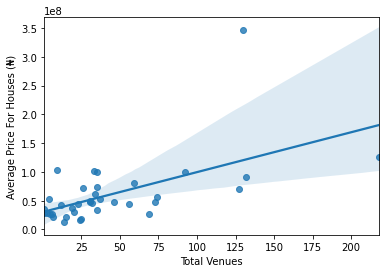

In [42]:
sns.regplot(x="Total Venues", y="Average Price For Houses (₦)", data=housing_data)

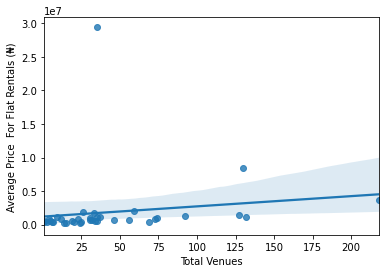

In [43]:
sns.regplot(x="Total Venues", y="Average Price  For Flat Rentals (₦)", data=housing_data)

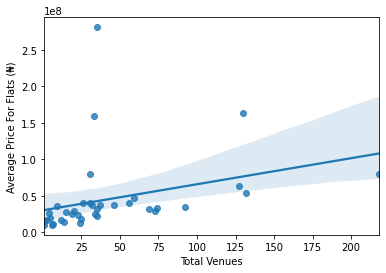

In [44]:
sns.regplot(x="Total Venues", y="Average Price For Flats (₦)", data=housing_data)

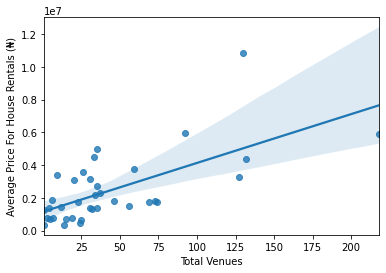

In [45]:
sns.regplot(x="Total Venues", y="Average Price For House Rentals (₦)", data=housing_data)

As I perceived, places with higher prices have a lot of venues around them.

Now let's look at the demand trends, We will look at the top areas with higher demand trends, as those areas are the areas where our investors are more likely to make more profits

In [46]:
top_twenty = housing_data.sort_values('Overall Demand Percentage (%)', ascending=False).head(20)
top_twenty.reset_index(drop=True, inplace=True)
top_twenty

,Areas,Average Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Total Property Count For Flat Rentals,Overall Demand Percentage (%),...,Sport facilities in area,Eatery locations in area,Nightlife Spots in area,Recreational centes in area,Government facilities in area,Schools in area,Stores N Services in area,Travel & Transport Services in area,Arts and Entertainment Centers in Area,Total Venues
0,Lekki,71190000,27382,40420000,1773,3570000,9231,1860000,9372,34.1,...,0,4,3,4,1,1,5,6,2,26
1,Ajah,44650000,5147,23070000,405,1720000,1408,800000,5995,13.0,...,1,5,2,1,1,1,7,4,1,23
2,Ikeja,91850000,1638,54400000,162,4380000,556,1140000,1578,8.1,...,0,32,13,4,11,7,28,14,9,132
3,Ikoyi,347170000,2167,163410000,575,10820000,1086,8500000,1435,6.3,...,1,36,14,9,7,11,14,19,4,130
4,Victoria Island (VI),125550000,831,79540000,326,5920000,655,3600000,1403,4.3,...,1,74,32,8,2,5,36,29,5,218
5,Ibeju Lekki,28750000,875,14770000,131,1240000,199,490000,969,4.1,...,0,0,0,1,0,0,0,0,0,1
6,Surulere,47550000,379,29660000,114,1830000,118,810000,1074,4.0,...,3,16,11,5,4,4,19,5,4,73
7,Yaba,56670000,120,32530000,92,1760000,153,920000,1238,3.9,...,4,18,4,5,5,15,12,5,6,74
8,Ikorodu,17070000,403,13180000,27,450000,77,260000,555,2.7,...,0,3,1,1,3,2,9,5,0,24
9,Magodo,103310000,931,36190000,16,3420000,409,1180000,592,2.4,...,0,0,0,2,1,0,4,2,0,9


Now's let compare the distribution of venues in the areas
We want locations with more venues with the demand percentage showing on top

Text(0.5, 1.0, 'Chart Showing the Venue distributions and the Demand percentage for Top Twenty Areas in Demand')

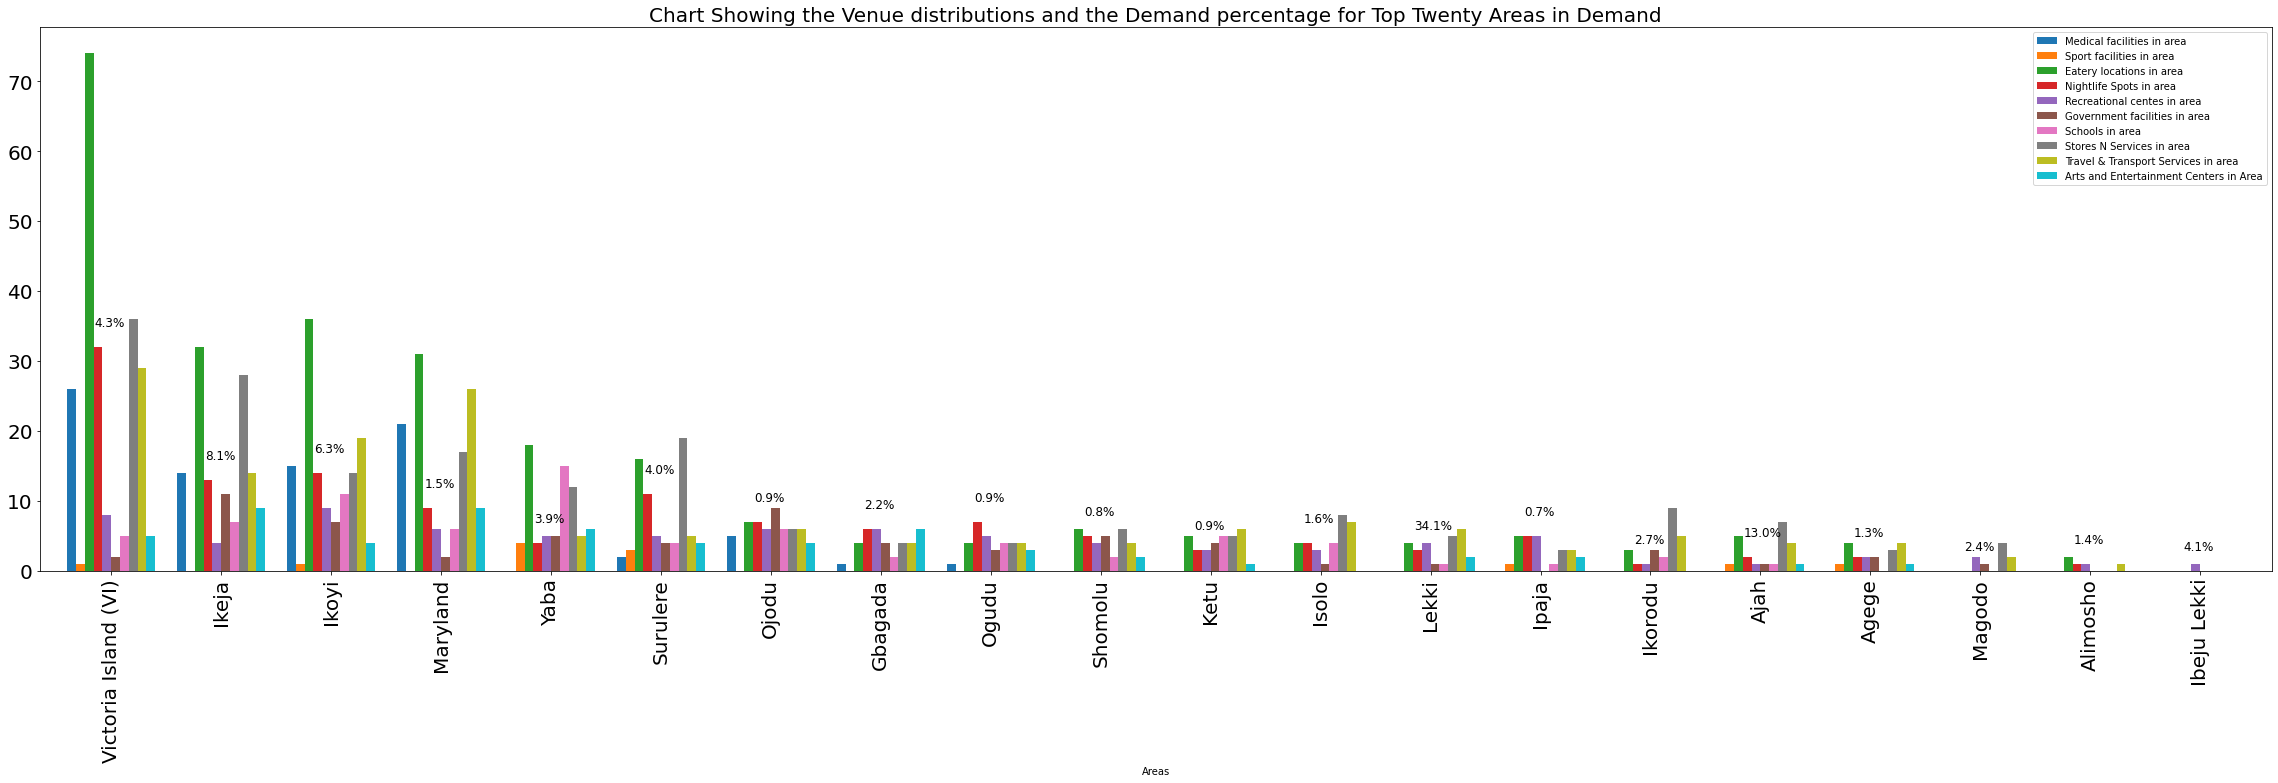

In [47]:
top_twenty.sort_values('Total Venues', ascending=False, inplace=True)


# Get the columns
column = top_twenty.columns


# Remove columns apart from the venue columns
ds = top_twenty.drop(columns = column[1:16])
ds = ds.drop(columns = ['Total Venues'])


# To get the values of the demand percent
Demand_Percent = []
for a, b in top_twenty['Overall Demand Percentage (%)'].iteritems():
    Demand_Percent.append(b)

      
import matplotlib as mpl

ax = ds.set_index('Areas').plot(kind='bar', figsize=(40,10), width = 0.8, fontsize = 20)

n = 0

for p in ax.patches[60:80]:
    ax.annotate('{}%'.format(Demand_Percent[n]),
                xy=(p.get_x()+0.01, p.get_height()+3), fontsize = 12)
    n += 1
    

ax.set_title("Chart Showing the Venue distributions and the Demand percentage for Top Twenty Areas in Demand", fontsize = 20)

###### ONE PERCENT RULE

In this Notebook I will only be calculating the one percent rule for Houses acquisition with the renting rates. 


All the one-percent rule says is that a property should rent for one-percent or more of its total upfront cost.

In [48]:
calcs_df = housing_data.loc[:, ('Areas','Average Price For Houses (₦)','Average Price For House Rentals (₦)','Total Property Count For Houses')]
calcs_df.sort_values('Average Price For Houses (₦)', ascending=False, inplace=True)
calcs_df.reset_index(drop=True, inplace=True)
calcs_df.head(10)

,Areas,Average Price For Houses (₦),Average Price For House Rentals (₦),Total Property Count For Houses
0,Ikoyi,347170000,10820000,2167
1,Victoria Island (VI),125550000,5920000,831
2,Magodo,103310000,3420000,931
3,Apapa,102290000,4500000,24
4,Eko Atlantic City,99650000,5000000,8
5,Lagos Island,99550000,5930000,20
6,Ikeja,91850000,4380000,1638
7,Ilupeju,80350000,3760000,64
8,Ogudu,74410000,2750000,143
9,Lekki,71190000,3570000,27382


So now we'll convert the rent rates for houses to monthly rates

In [49]:
calcs_df['House Rentals Monthly (₦)'] = np.round(((calcs_df['Average Price For House Rentals (₦)'])/12), 0)

In [50]:
calcs_df.head()

,Areas,Average Price For Houses (₦),Average Price For House Rentals (₦),Total Property Count For Houses,House Rentals Monthly (₦)
0,Ikoyi,347170000,10820000,2167,901667.0
1,Victoria Island (VI),125550000,5920000,831,493333.0
2,Magodo,103310000,3420000,931,285000.0
3,Apapa,102290000,4500000,24,375000.0
4,Eko Atlantic City,99650000,5000000,8,416667.0


Time to find out how many of this areas pass the one percent rule

In [51]:
calcs_df['rent/price'] = np.round((((calcs_df['House Rentals Monthly (₦)'])/(calcs_df['Average Price For Houses (₦)']))*100), 2)

In [52]:
calcs_df

,Areas,Average Price For Houses (₦),Average Price For House Rentals (₦),Total Property Count For Houses,House Rentals Monthly (₦),rent/price
0,Ikoyi,347170000,10820000,2167,901667.0,0.26
1,Victoria Island (VI),125550000,5920000,831,493333.0,0.39
2,Magodo,103310000,3420000,931,285000.0,0.28
3,Apapa,102290000,4500000,24,375000.0,0.37
4,Eko Atlantic City,99650000,5000000,8,416667.0,0.42
5,Lagos Island,99550000,5930000,20,494167.0,0.50
6,Ikeja,91850000,4380000,1638,365000.0,0.40
7,Ilupeju,80350000,3760000,64,313333.0,0.39
8,Ogudu,74410000,2750000,143,229167.0,0.31
9,Lekki,71190000,3570000,27382,297500.0,0.42


instead of sticking to the one percent rule, let's change it to 0.25 due to the data available.

In [53]:
calcs_df['percent_rule'] = calcs_df['rent/price']>0.25

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
calcs_df['percent_rule'] = label_encoder.fit_transform(calcs_df['percent_rule'])

In [55]:
calcs_df

,Areas,Average Price For Houses (₦),Average Price For House Rentals (₦),Total Property Count For Houses,House Rentals Monthly (₦),rent/price,percent_rule
0,Ikoyi,347170000,10820000,2167,901667.0,0.26,1
1,Victoria Island (VI),125550000,5920000,831,493333.0,0.39,1
2,Magodo,103310000,3420000,931,285000.0,0.28,1
3,Apapa,102290000,4500000,24,375000.0,0.37,1
4,Eko Atlantic City,99650000,5000000,8,416667.0,0.42,1
5,Lagos Island,99550000,5930000,20,494167.0,0.50,1
6,Ikeja,91850000,4380000,1638,365000.0,0.40,1
7,Ilupeju,80350000,3760000,64,313333.0,0.39,1
8,Ogudu,74410000,2750000,143,229167.0,0.31,1
9,Lekki,71190000,3570000,27382,297500.0,0.42,1


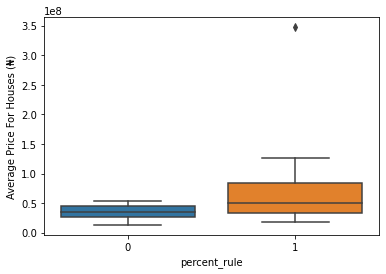

In [56]:
sns.boxplot(x="percent_rule", y="Average Price For Houses (₦)", data=calcs_df)

Time For Clusterimg

In [57]:
housing_data = housing_data.join(calcs_df.loc[:,('rent/price','percent_rule')])
housing_data.head()

,Areas,Average Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Total Property Count For Flat Rentals,Overall Demand Percentage (%),...,Nightlife Spots in area,Recreational centes in area,Government facilities in area,Schools in area,Stores N Services in area,Travel & Transport Services in area,Arts and Entertainment Centers in Area,Total Venues,rent/price,percent_rule
0,Agege,37660000,343,24610000,57,800000,50,540000,296,1.3,...,2,2,2,0,3,4,1,19,0.26,1
1,Ajah,44650000,5147,23070000,405,1720000,1408,800000,5995,13.0,...,2,1,1,1,7,4,1,23,0.39,1
2,Alimosho,26260000,283,19660000,50,730000,44,470000,182,1.4,...,1,1,0,0,0,1,0,5,0.28,1
3,Amuwo Odofin,53120000,77,26420000,13,1370000,25,880000,101,0.6,...,0,0,0,0,0,4,0,4,0.37,1
4,Apapa,102290000,24,158750000,4,4500000,7,1740000,14,0.3,...,8,4,4,2,4,4,0,33,0.42,1


In [58]:
!pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [59]:
housing_cluster = housing_data.drop(['Areas', 'Total Property Count For Houses', 'Total Property Count For House Rentals', 'Average Price For Flats (₦)', 'Total Property Count For Flats','Average Price  For Flat Rentals (₦)','Total Property Count  For Flat Rentals','Demand Percentage For Rentals (%)','Demand Percentage For Sales (%)','Demand Percentage For Short Lets (%)', 'Demand Percentage For Joint Ventures (%)','Latitude', 'Longitude'], 1)

In [60]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define standard scaler
scaler = MinMaxScaler()
# transform data
housing_cluster = scaler.fit_transform(housing_cluster)

In [61]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 0} # A list holds the SSE values for each k

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(housing_cluster)
    sse.append(kmeans.inertia_)

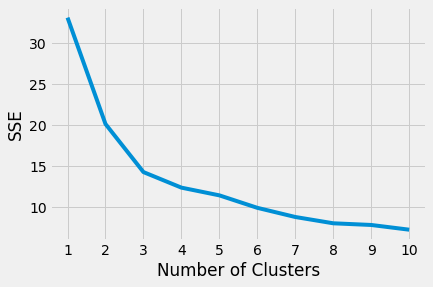

In [62]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [63]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing") ##TO help in finding  the knee
kl.elbow

3

In [64]:
kmeans =  KMeans(n_clusters=3, random_state=0).fit(housing_cluster)

In [65]:
# add clustering labels
housing_data.insert(0, 'Cluster Labels', kmeans.labels_)

In [66]:
housing_data.sort_values('Overall Demand Percentage (%)', ascending=False)

,Cluster Labels,Areas,Average Price For Houses (₦),Total Property Count For Houses,Average Price For Flats (₦),Total Property Count For Flats,Average Price For House Rentals (₦),Total Property Count For House Rentals,Average Price For Flat Rentals (₦),Total Property Count For Flat Rentals,...,Nightlife Spots in area,Recreational centes in area,Government facilities in area,Schools in area,Stores N Services in area,Travel & Transport Services in area,Arts and Entertainment Centers in Area,Total Venues,rent/price,percent_rule
25,2,Lekki,71190000,27382,40420000,1773,3570000,9231,1860000,9372,...,3,4,1,1,5,6,2,26,0.35,1
1,2,Ajah,44650000,5147,23070000,405,1720000,1408,800000,5995,...,2,1,1,1,7,4,1,23,0.39,1
13,0,Ikeja,91850000,1638,54400000,162,4380000,556,1140000,1578,...,13,4,11,7,28,14,9,132,0.36,1
16,0,Ikoyi,347170000,2167,163410000,575,10820000,1086,8500000,1435,...,14,9,7,11,14,19,4,130,0.31,1
35,0,Victoria Island (VI),125550000,831,79540000,326,5920000,655,3600000,1403,...,32,8,2,5,36,29,5,218,0.22,0
9,2,Ibeju Lekki,28750000,875,14770000,131,1240000,199,490000,969,...,0,1,0,0,0,0,0,1,0.42,1
34,2,Surulere,47550000,379,29660000,114,1830000,118,810000,1074,...,11,5,4,4,19,5,4,73,0.29,1
36,1,Yaba,56670000,120,32530000,92,1760000,153,920000,1238,...,4,5,5,15,12,5,6,74,0.24,0
14,1,Ikorodu,17070000,403,13180000,27,450000,77,260000,555,...,1,1,3,2,9,5,0,24,0.21,0
26,2,Magodo,103310000,931,36190000,16,3420000,409,1180000,592,...,0,2,1,0,4,2,0,9,0.84,1


Let's analyse the cluster data

In [69]:
housing_data['Cluster Labels'] = housing_data['Cluster Labels'].astype('int64')

In [70]:
clusters = housing_data.loc[:,('Areas','Average Price For Houses (₦)', 'Overall Demand Percentage (%)', 'Total Venues', 'rent/price', 'percent_rule','Cluster Labels')]
cluster0 = clusters[clusters['Cluster Labels']==0]
cluster1 = clusters[clusters['Cluster Labels']==1]
cluster2 = clusters[clusters['Cluster Labels']==2]

cluster2_topfive = cluster2.sort_values('Overall Demand Percentage (%)', ascending=False).head()

In [71]:
df0 = cluster0[cluster0.columns[1:]].mean(axis = 0, skipna = True)
df1 = cluster1[cluster1.columns[1:]].mean(axis = 0, skipna = True)
df2 = cluster2[cluster2.columns[1:]].mean(axis = 0, skipna = True)

def create_series(array, df):
    S = pd.Series(['Mean',array[0],array[1],array[2],array[3],array[4],array[5]], index=['Areas','Average Price For Houses (₦)','Overall Demand Percentage (%)','Total Venues','rent/price','percent_rule','Cluster Labels'])
    df = df.append(S, ignore_index=True)
    return df

#Add sum of values 
cluster0 = create_series(df0.values, cluster0)
cluster1 = create_series(df1.values, cluster1)
cluster2 = create_series(df2.values, cluster2)

In [72]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler

# define min max scaler

def scale_cluster(clusters):
    scaler = MinMaxScaler()
    # transform data
    clusters[clusters.columns[1:]] = scaler.fit_transform(clusters[clusters.columns[1:]])
    return clusters

#Scale the cluster
cluster0 = scale_cluster(cluster0)
cluster1 = scale_cluster(cluster1)
cluster2 = scale_cluster(cluster2)

# Getting the size of the columns
col0, row0 = cluster0.shape
col1, row1 = cluster1.shape
col2, row2 = cluster2.shape

# appending col positions on the list
cols = [col0-1,col1-1,col2-1]
clustered = [cluster0, cluster1, cluster2]

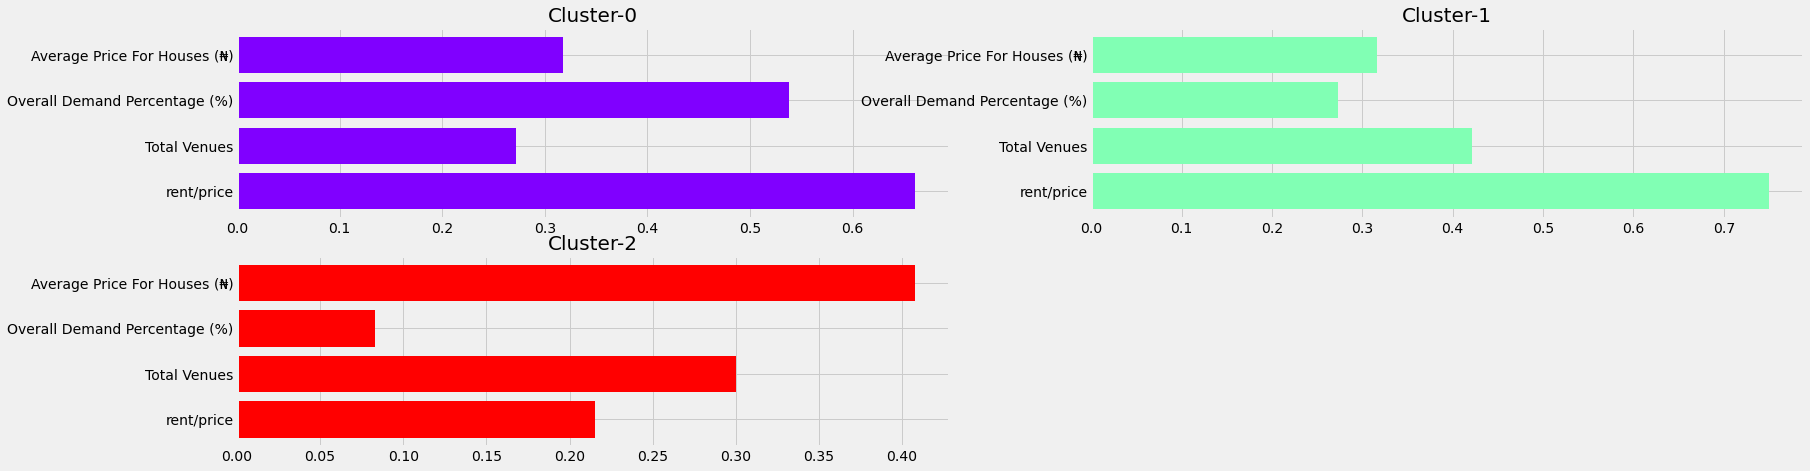

In [73]:
Fig=plt.figure(figsize=(25,15))
colors=cm.rainbow(np.linspace(0,1,3))
for i in range(3):
    ax=Fig.add_subplot(4,2,i+1)  
    ax.barh(clustered[i].drop(['Cluster Labels','percent_rule'],axis=1).iloc[cols[i],1:].index[:5],clustered[i].drop(['Cluster Labels','percent_rule'],axis=1).iloc[cols[i],1:][:5],color=colors[i])
    plt.title('Cluster-{}'.format(i),size=20)
    plt.gca().invert_yaxis()

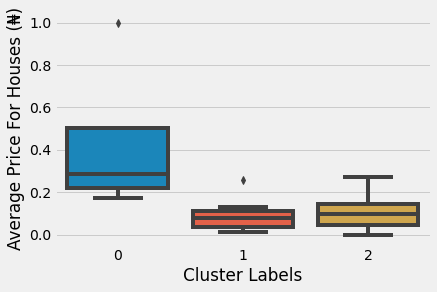

In [86]:
sns.boxplot(x="Cluster Labels", y="Average Price For Houses (₦)", data=housing_data)

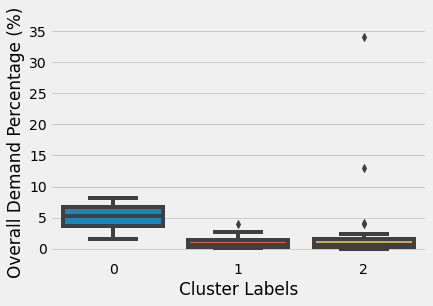

In [88]:
sns.boxplot(x="Cluster Labels", y="Overall Demand Percentage (%)", data=housing_data)

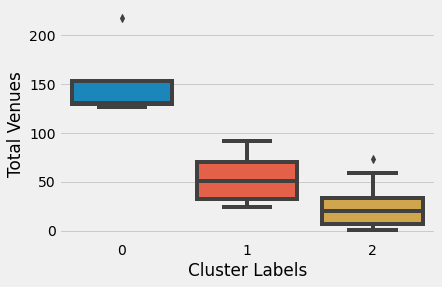

In [89]:
sns.boxplot(x="Cluster Labels", y="Total Venues", data=housing_data)

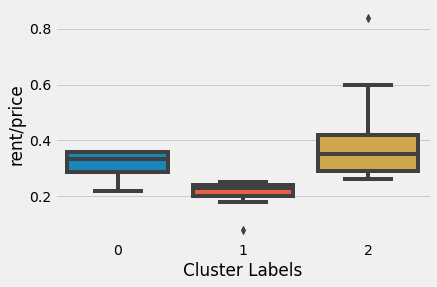

In [90]:
sns.boxplot(x="Cluster Labels", y="rent/price", data=housing_data)

## CLUSTER 0

In [91]:
cluster0.sort_values('Overall Demand Percentage (%)', ascending=False).reset_index(drop=True)

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
0,Ikeja,0.075062,1.000000,0.054945,1.000000,1.00,0.0
1,Ikoyi,1.000000,0.727273,0.032967,0.642857,1.00,0.0
2,Mean,0.318052,0.537879,0.271978,0.660714,0.75,0.0
3,Victoria Island (VI),0.197145,0.424242,1.000000,0.000000,0.00,0.0
4,Maryland,0.000000,0.000000,0.000000,1.000000,1.00,0.0


## CLUSTER 1

In [92]:
cluster1.sort_values('Overall Demand Percentage (%)', ascending=False).reset_index(drop=True)

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
0,Yaba,0.480116,1.000000,0.735294,0.941176,0.0,0.0
1,Ikorodu,0.000000,0.684211,0.000000,0.764706,0.0,0.0
2,Mean,0.315849,0.273026,0.420956,0.750000,0.0,0.0
3,Ojodu,0.335354,0.210526,0.470588,0.882353,0.0,0.0
4,Ipaja,0.019156,0.157895,0.014706,1.000000,0.0,0.0
5,Lagos Island,1.000000,0.078947,1.000000,0.000000,0.0,0.0
6,Kosofe,0.113725,0.026316,0.661765,0.588235,0.0,0.0
7,Mushin,0.200533,0.026316,0.161765,0.882353,0.0,0.0
8,Isheri,0.377910,0.000000,0.323529,0.941176,0.0,0.0


## CLUSTER 2

In [96]:
cluster2['percent_rule'].replace(to_replace=[0], value=[1], inplace=True) #this is done because after passing the standardscaling on the cluster, it turns the cluster2['percent_rule'] to zero, as all are originally one
cluster2.sort_values('Overall Demand Percentage (%)', ascending=False).reset_index(drop=True)

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
0,Lekki,0.644454,1.000000,0.347222,0.155172,1.0,0.0
1,Ajah,0.350675,0.381232,0.305556,0.224138,1.0,0.0
2,Ibeju Lekki,0.174673,0.120235,0.000000,0.275862,1.0,0.0
3,Surulere,0.382776,0.117302,1.000000,0.051724,1.0,0.0
4,Mean,0.407700,0.082815,0.300000,0.215172,1.0,0.0
5,Magodo,1.000000,0.070381,0.111111,1.000000,1.0,0.0
6,Gbagada,0.445650,0.064516,0.500000,0.224138,1.0,0.0
7,Isolo,0.382112,0.046921,0.416667,0.103448,1.0,0.0
8,Alimosho,0.147111,0.041056,0.055556,0.034483,1.0,0.0
9,Agege,0.273301,0.038123,0.250000,0.000000,1.0,0.0


Reviewing only the top Areas in cluster2 using The Mean Values

Text(0.5, 1.0, 'Determining the top values of Cluster 2')

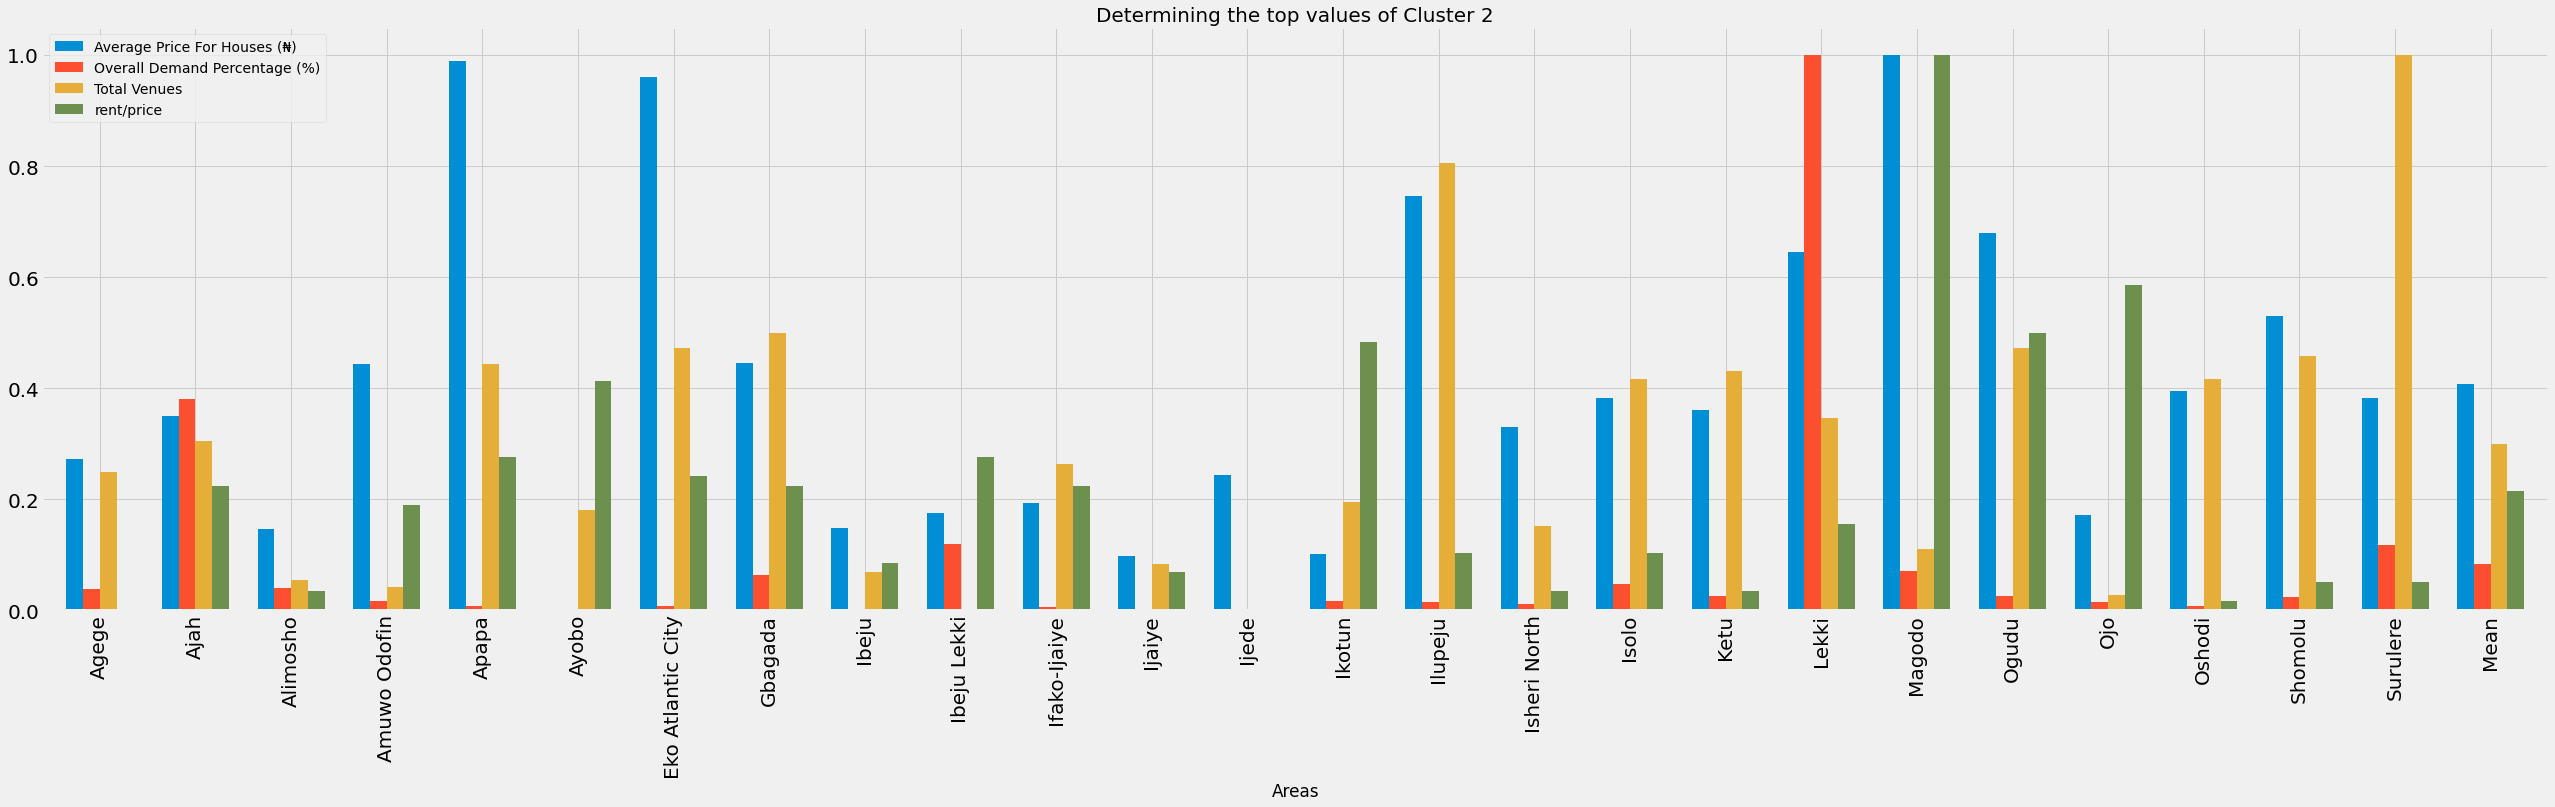

In [99]:
# Get the columns
column = top_twenty.columns
    
import matplotlib as mpl

ax = cluster2.drop(['percent_rule','Cluster Labels'], 1).set_index('Areas').plot(kind='bar', figsize=(40,10), width = 0.7, fontsize = 20)

ax.set_title("Determining the top values of Cluster 2", fontsize = 20)

Areas below the mean rent/price values are dropped

In [100]:
cluster2tops = cluster2[cluster2['rent/price']>0.2]
cluster2tops = cluster2tops.sort_values('rent/price', ascending=False).head()
cluster2tops

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
19,Magodo,1.000000,0.070381,0.111111,1.000000,1.0,0.0
21,Ojo,0.171574,0.014663,0.027778,0.586207,1.0,0.0
20,Ogudu,0.680097,0.026393,0.472222,0.500000,1.0,0.0
13,Ikotun,0.101395,0.017595,0.194444,0.482759,1.0,0.0
5,Ayobo,0.000000,0.002933,0.180556,0.413793,1.0,0.0


Areas below the mean Total_venues are dropped

In [102]:
cluster2tops1 = cluster2[cluster2['Total Venues']>0.3]
cluster2tops1 = cluster2tops1.sort_values('Total Venues', ascending=False).head()
cluster2tops1 = cluster2tops1.drop(20) # because index 20 already exists
cluster2tops1

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
24,Surulere,0.382776,0.117302,1.000000,0.051724,1.0,0.0
14,Ilupeju,0.745849,0.014663,0.805556,0.103448,1.0,0.0
7,Gbagada,0.445650,0.064516,0.500000,0.224138,1.0,0.0
6,Eko Atlantic City,0.959486,0.008798,0.472222,0.241379,1.0,0.0


Areas below the mean Overall Demand Percentage are dropped

In [103]:
cluster2tops2 = cluster2[cluster2['Overall Demand Percentage (%)']>0.08]
cluster2tops2 =cluster2tops2.sort_values('Overall Demand Percentage (%)', ascending=False).head()
cluster2tops2 = cluster2tops2.drop(24) # because 24 already exists
cluster2tops2

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
18,Lekki,0.644454,1.000000,0.347222,0.155172,1.0,0.0
1,Ajah,0.350675,0.381232,0.305556,0.224138,1.0,0.0
9,Ibeju Lekki,0.174673,0.120235,0.000000,0.275862,1.0,0.0
25,Mean,0.407700,0.082815,0.300000,0.215172,1.0,0.0


Joining the top Areas for each category

In [104]:
top_cluster2_areas = cluster2tops.append(cluster2tops1)
top_cluster2_areas = top_cluster2_areas.append(cluster2tops2)
top_cluster2_areas = top_cluster2_areas.sort_values('Overall Demand Percentage (%)', ascending=False).drop(25)
top_cluster2_areas.reset_index(drop=True)

,Areas,Average Price For Houses (₦),Overall Demand Percentage (%),Total Venues,rent/price,percent_rule,Cluster Labels
0,Lekki,0.644454,1.000000,0.347222,0.155172,1.0,0.0
1,Ajah,0.350675,0.381232,0.305556,0.224138,1.0,0.0
2,Ibeju Lekki,0.174673,0.120235,0.000000,0.275862,1.0,0.0
3,Surulere,0.382776,0.117302,1.000000,0.051724,1.0,0.0
4,Magodo,1.000000,0.070381,0.111111,1.000000,1.0,0.0
5,Gbagada,0.445650,0.064516,0.500000,0.224138,1.0,0.0
6,Ogudu,0.680097,0.026393,0.472222,0.500000,1.0,0.0
7,Ikotun,0.101395,0.017595,0.194444,0.482759,1.0,0.0
8,Ojo,0.171574,0.014663,0.027778,0.586207,1.0,0.0
9,Ilupeju,0.745849,0.014663,0.805556,0.103448,1.0,0.0


For Optimal reasons after viewing the data, Areas in Cluster One will be recommended for our stakeholders, as they have lower avg prices, a high rent to price ratio and they contain the highest areas in demand, after that the areas in cluster 2 will be the backup option for our Stakeholders but we will only using the top five areas in demand in cluster 0 as they are the closest of the areas in the cluster that meet our demands **(The amount of venues they have is very promising)**, and the the areas in Cluster 0 will be the third option.

* CLusters for recommendations
-----------------------------------------------------------------------

        * Cluster One  --Top Recommendations--
            - Ikeja
            - Ikoyi 
            - Victoria Island (VI)
            - Maryland
        
-----------------------------------------------------------------------

       * Cluster Two (Top Five) -- Second Tier --
           - Lekki
           - Ajah
           - Ibeju Lekki
           - Surulere
           - Magodo 
           
      * Cluster Two (Bottom Six) -- Third Tier ---
           - Gbagada
           - Ogudu
           - Ikotun
           - Ojo
           - Illupeju
           - Eko Atlantic City
       
-----------------------------------------------------------------------
    
    * Cluster Zero -- Not Advisable --
            - Yaba
            - Ikorodu
            - Ojodu
            - Ipaja
            - Lagos Island
            - Kosofe
            - Mushin
            - Isheri
----------------------------------------------------------------